In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X= np.load('X.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
Y= np.load('y.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train=X_train/255
X_test=X_test/255

X_train=X_train.T
X_test=X_test.T


Y_train = np.squeeze(np.eye(10)[Y_train.reshape(-1)])

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("X",X.shape)
print("Y",Y.shape)
print(Y_train)
print(Y_train.shape)

X_train shape: (400, 4000)
Y_train shape: (4000, 10)
X_test shape: (400, 1000)
Y_test shape: (1000, 1)
X (5000, 400)
Y (5000, 1)
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(4000, 10)


In [26]:
def layer_size(X,Y):
    n_x=X.shape[0]
    n_y=10
    n_h=25
    return (n_x, n_h, n_y)


In [27]:
def initialize(n_x, n_h, n_y):
    np.random.seed(2)
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [28]:
def forward_propagation(X, parameters):
    
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1=np.maximum(0,Z1)
    Z2=np.dot(W2,A1)+b2
    A2= np.exp(Z2)/np.sum(np.exp(Z2),axis=0, keepdims=True)
        
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
#     print("Z1",Z1.shape)
#     print("A1",A1.shape)
#     print("Z2",Z2.shape)
#     print("A2",A2.shape)
    return A2, cache

In [29]:
def compute_cost(A2, Y):
    m=Y.shape[0]
    
    cost=(-1/m)*(np.dot(Y, np.log(A2)) + np.dot((1-Y), np.log(1-A2)))
    

    #remember to check for transpose
    #cost = float(np.squeeze(cost))
    return cost

In [30]:
def relu_derivative(Z1):
    if Z1<=0:
        return 0
    if Z1>0:
        return 1

In [31]:
def backward_propagation(parameters, cache, X, Y):
    m=X.shape[0]
    
    
    W1=parameters["W1"]
    W2=parameters["W2"]
    A1=cache["A1"]
    A2=cache["A2"]
    Z1=cache["Z1"]
    
    dZ2 =A2-Y.T
    dW2 =(1/m)*np.dot(dZ2,A1.T)
    db2 =(1/m)*(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 =np.dot(W2.T,dZ2) * np.where(Z1 > 0, 1, 0)
    dW1 =(1/m) *(np.dot(dZ1,X.T))
    db1 =(1/m)*(np.sum(dZ1,axis=1,keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
    

In [32]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [33]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    n_x=X.shape[0]
    n_y=10
    
    
    parameters =initialize(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y". Outputs: "cost"
        cost = compute_cost(A2, Y)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, 0.2)

        if i%100==0:
            print("cost after",i,"iteration is",cost[0][0])
    
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters,cost

In [34]:
parameters,cost=nn_model(X_train,Y_train,30,num_iterations=1200,print_cost=True)
print("The final Cost is ---->",cost[0][0])

cost after 0 iteration is 0.0008127062718139262
cost after 100 iteration is 0.0007997907586146954
cost after 200 iteration is 0.0007997896756502383
cost after 300 iteration is 0.0007997882488400984
cost after 400 iteration is 0.0007997866173243023
cost after 500 iteration is 0.0007997843482943255
cost after 600 iteration is 0.0007997813170808737
cost after 700 iteration is 0.0007997786006193275
cost after 800 iteration is 0.0007997748549474844
cost after 900 iteration is 0.0007997723191699959
cost after 1000 iteration is 0.0007997718834121302
cost after 1100 iteration is 0.0007997729353760417
cost after 1200 iteration is 0.0007997908804788489
The final Cost is ----> 0.0007998334007893948


A2 [[0.09472636 0.09470493 0.09472803 0.09470399 0.09472615 0.09472799
  0.09478973 0.09473233 0.09472649 0.09475349 0.09472921 0.09473122
  0.09475465 0.09472705 0.09474792 0.09469909 0.09472892 0.09473201
  0.09472453 0.09472335 0.09472708 0.09471624 0.09472614 0.09472992
  0.0947454  0.09476324 0.0947242  0.09472766 0.09474394 0.09472625]
 [0.10054702 0.10047217 0.10055057 0.10047364 0.10054656 0.1005505
  0.1006918  0.10055976 0.10054729 0.10060419 0.1005531  0.10055739
  0.10060696 0.10054848 0.10041992 0.10048485 0.10055247 0.10055907
  0.10054312 0.1005406  0.10054855 0.10045425 0.10054654 0.10055461
  0.10058669 0.10062772 0.10054241 0.10054979 0.10058367 0.10054678]
 [0.09879549 0.09863635 0.09880331 0.09863823 0.09879447 0.09880315
  0.09916031 0.09882357 0.09879608 0.09892765 0.09880888 0.09881835
  0.0989348  0.0987987  0.09858997 0.09865784 0.0988075  0.09882205
  0.09878689 0.09878132 0.09879885 0.09861353 0.09879441 0.09881221
  0.09888509 0.09898987 0.09878532 0.0988015

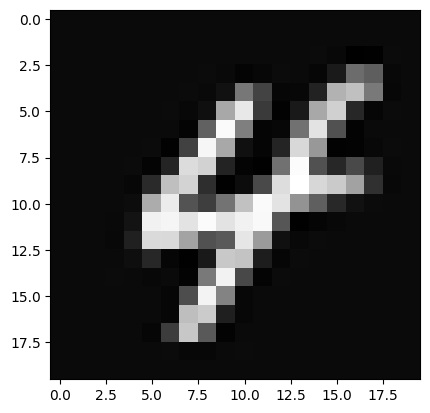

In [35]:
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

    
X_random = X[2345].reshape((20,20)).T
plt.imshow(X_random, cmap='gray')
X_random=X[2345]/255



Z1=np.dot(W1,X_random)+b1
A1=np.maximum(0,Z1)
Z2=np.dot(W2,A1)+b2
A2= np.exp(Z2)/np.sum(np.exp(Z2),axis=0, keepdims=True)
print("A2",A2)

A2 =np.array([A2[0][0],A2[1][0],A2[2][0],A2[3][0],A2[4][0],A2[5][0],A2[6][0],A2[7][0],A2[8][0],A2[9][0]])
print(A2.argmax())